<a href="https://colab.research.google.com/github/Geringer13/Netology_pyda/blob/master/Machine_learning_Laboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_curve
import seaborn as sns
from scipy.stats import pearsonr

In [0]:
data = pd.read_csv('flag.data', header=None)

In [9]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [0]:
data.columns = ['name',
 'landmass',
 'zone',
 'area',
 'population',
 'language',
 'religion',
 'bars',
 'stripes',
 'colours',
 'red',
 'green',
 'blue',
 'gold',
 'white',
 'black',
 'orange',
 'mainhue',
 'circles',
 'crosses',
 'saltires',
 'quarters',
 'sunstars',
 'crescent',
 'triangle',
 'icon',
 'animate',
 'text',
 'topleft',
 'botright']

In [28]:
len(data)

194

**Задание 1 - провести описание данных**

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
0     194 non-null object
1     194 non-null int64
2     194 non-null int64
3     194 non-null int64
4     194 non-null int64
5     194 non-null int64
6     194 non-null int64
7     194 non-null int64
8     194 non-null int64
9     194 non-null int64
10    194 non-null int64
11    194 non-null int64
12    194 non-null int64
13    194 non-null int64
14    194 non-null int64
15    194 non-null int64
16    194 non-null int64
17    194 non-null object
18    194 non-null int64
19    194 non-null int64
20    194 non-null int64
21    194 non-null int64
22    194 non-null int64
23    194 non-null int64
24    194 non-null int64
25    194 non-null int64
26    194 non-null int64
27    194 non-null int64
28    194 non-null object
29    194 non-null object
dtypes: int64(26), object(4)
memory usage: 45.6+ KB


In [65]:
data.describe()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,0.788660,0.469072,0.510309,0.469072,0.752577,0.268041,0.134021,0.170103,0.149485,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474
std,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,0.409315,0.500334,0.501187,0.500334,0.432631,0.444085,0.341556,0.463075,0.385387,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
max,6.000000,4.000000,22402.000000,1008.000000,10.000000,7.000000,5.000000,14.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

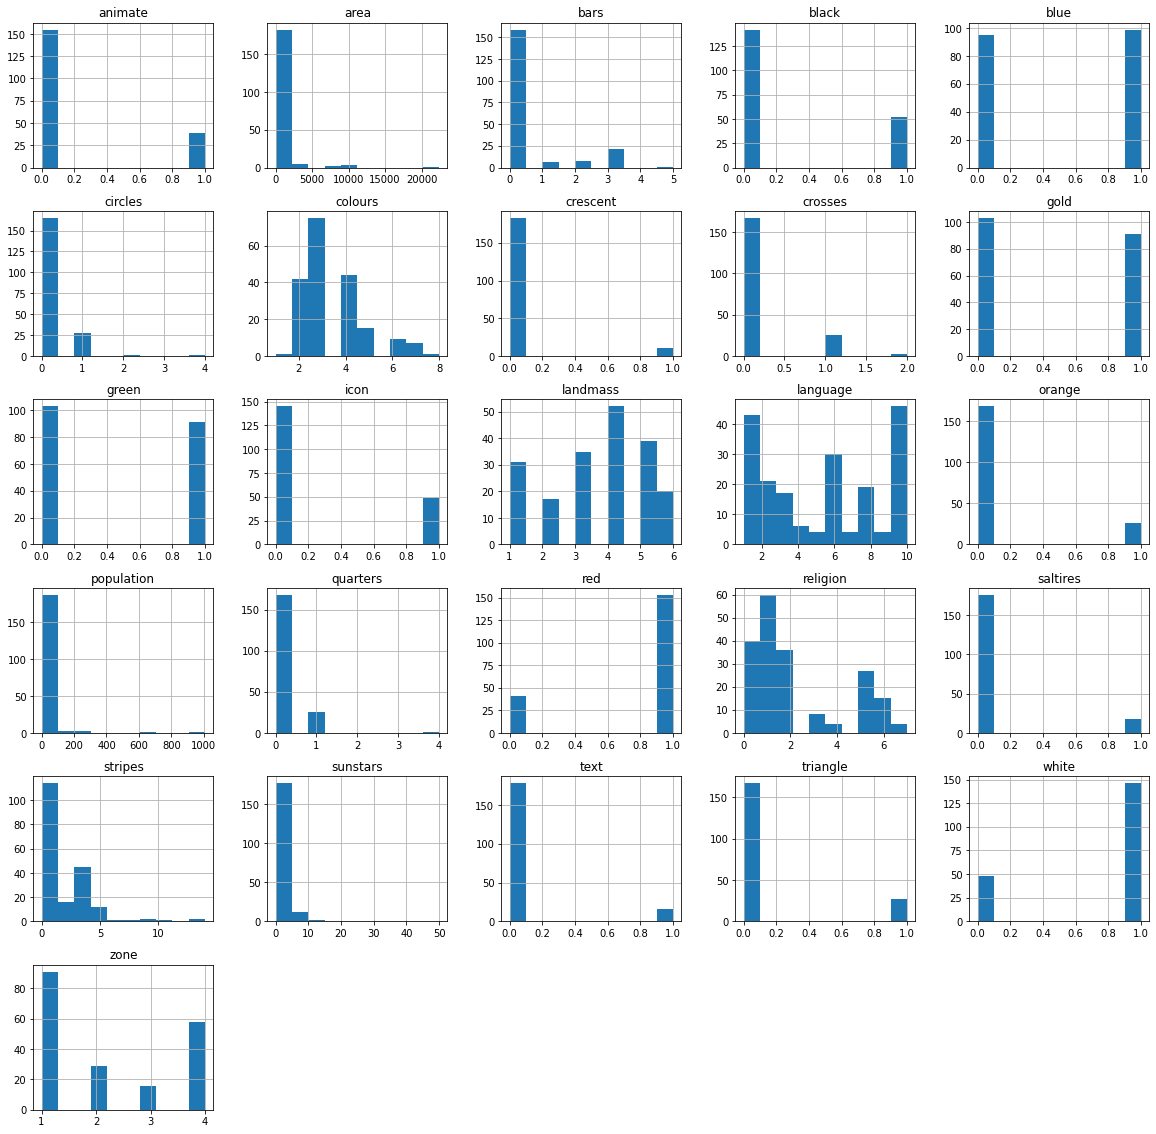

In [82]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,20
data.hist()
plt.show()

**Задание 2 - предложить стратегию по работе с категориальными признаками**

Предлагаю перевести категориальные признаки в числа

In [0]:
le = LabelEncoder()

In [96]:
le.fit_transform(data['name'])
le.fit_transform(data['mainhue'])
le.fit_transform(data['topleft'])
le.fit_transform(data['botright'])

array([4, 6, 7, 6, 6, 0, 1, 6, 1, 1, 1, 6, 1, 6, 4, 1, 6, 6, 4, 6, 6, 4,
       1, 4, 1, 3, 6, 4, 6, 7, 3, 6, 4, 1, 3, 6, 6, 6, 6, 4, 6, 1, 1, 1,
       7, 6, 6, 4, 4, 1, 6, 0, 1, 6, 6, 7, 1, 1, 7, 6, 6, 6, 1, 4, 3, 3,
       4, 6, 1, 6, 6, 6, 1, 4, 4, 4, 6, 1, 1, 4, 1, 4, 7, 6, 0, 5, 1, 6,
       4, 3, 7, 4, 6, 4, 1, 6, 6, 6, 1, 6, 4, 6, 1, 4, 4, 7, 6, 6, 6, 1,
       4, 4, 6, 1, 7, 6, 1, 6, 3, 1, 1, 1, 7, 1, 1, 4, 4, 3, 1, 0, 6, 4,
       4, 7, 0, 1, 6, 6, 6, 6, 6, 2, 6, 4, 1, 4, 4, 6, 4, 1, 7, 4, 1, 1,
       7, 0, 6, 3, 1, 6, 1, 4, 0, 4, 1, 1, 6, 0, 6, 1, 6, 4, 6, 7, 6, 6,
       1, 1, 0, 6, 6, 7, 7, 6, 6, 4, 7, 6, 6, 6, 6, 4, 2, 4])

In [0]:
data['name'] = le.transform(data['name'])
data['mainhue'] = le.transform(data['mainhue'])
data['topleft'] = le.transform(data['topleft'])
data['botright'] = le.transform(data['botright'])

**Задание 3 - провести углублённый анализ данных, корреляций, взаимосвязей**

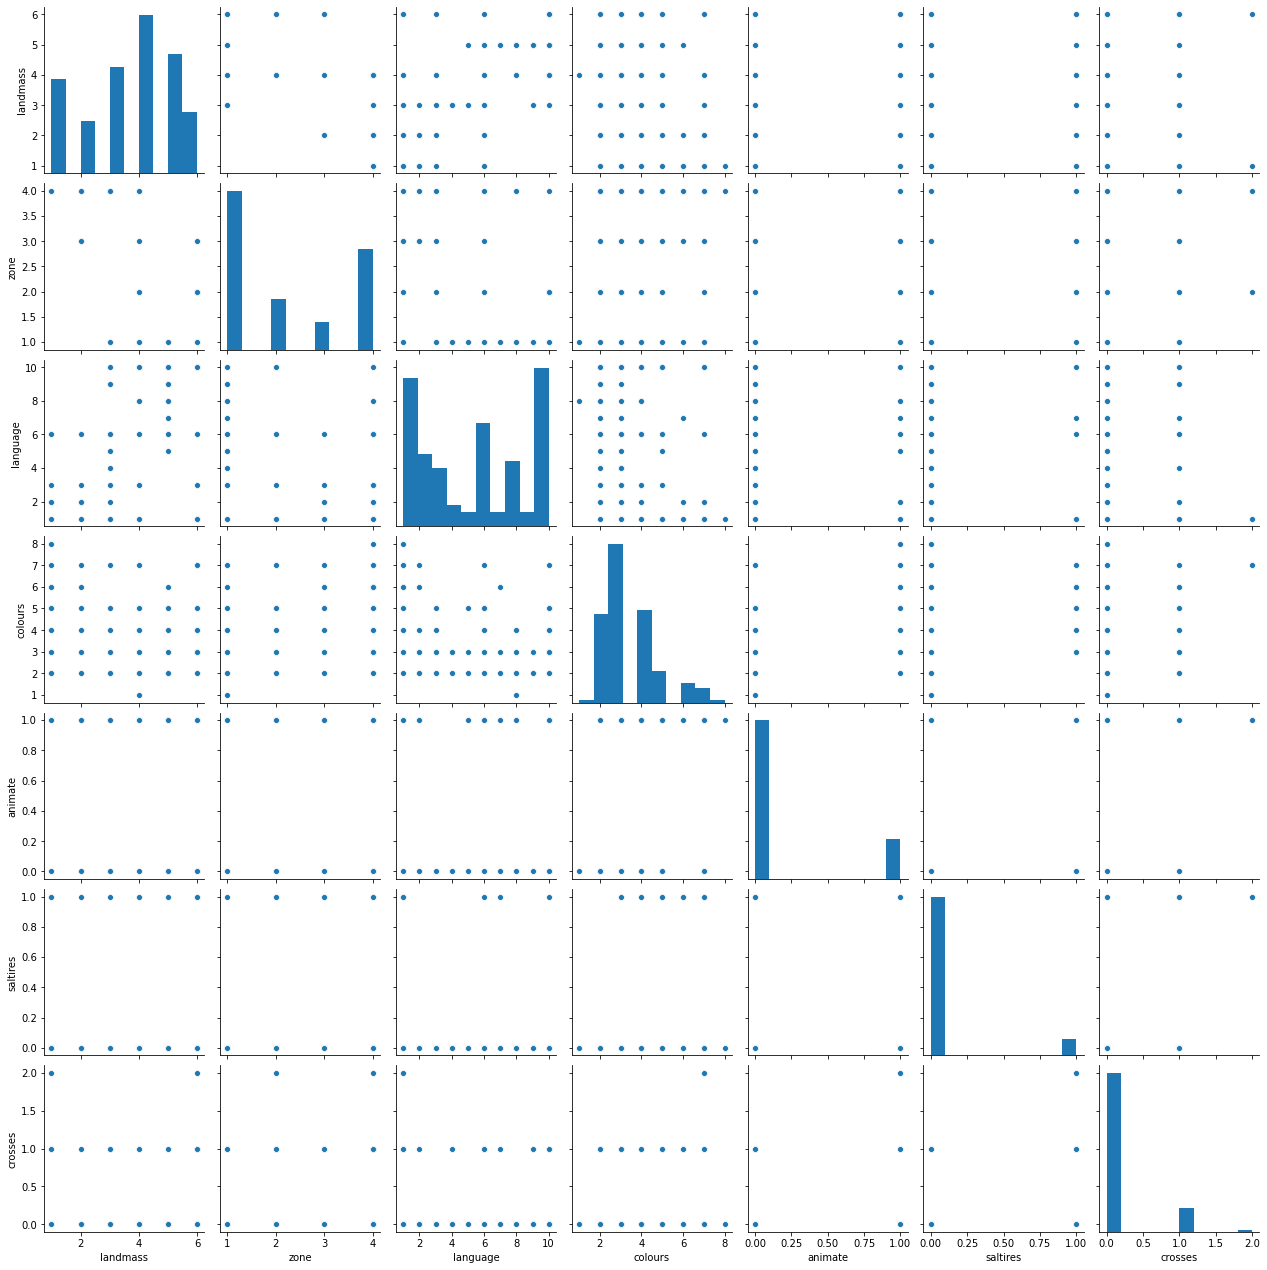

In [116]:
sns.pairplot(data[['landmass', 'zone', 'language', 'colours', 'animate', 'saltires', 'crosses']])

In [115]:
data.corr()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
name,1.000000,0.170270,-0.087289,-0.006473,-0.026453,0.137082,0.050569,-0.025418,0.097415,0.050962,-0.001916,0.033476,-0.058092,-3.698024e-02,0.120943,0.021611,0.030530,0.168813,-0.086189,-0.000359,-0.029187,0.069763,0.047556,0.066265,0.066614,-0.001165,-0.080039,-0.058889,0.065407,9.340343e-03
landmass,0.170270,1.000000,-0.615759,0.013279,0.105940,0.496400,0.325073,-0.139290,-0.063375,-0.062856,0.093400,0.026226,-0.177366,-8.046485e-02,-0.004134,-0.058243,0.020744,0.028659,0.065696,-0.031103,-0.003429,-0.004537,-0.034843,0.168438,-0.033154,0.030359,-0.118856,-0.110743,0.115328,-3.784420e-02
zone,-0.087289,-0.615759,1.000000,-0.025431,-0.124111,-0.618387,-0.320537,0.085446,0.002359,0.173567,-0.032269,0.069404,0.206066,1.643917e-01,-0.035296,0.026847,0.052239,-0.113658,-0.042542,0.101441,0.179667,0.153300,0.121754,-0.159272,0.060416,-0.048692,0.106034,0.037602,-0.022294,-3.110113e-02
area,-0.006473,0.013279,-0.025431,1.000000,0.519030,-0.027869,0.087941,0.001243,0.028454,-0.162227,-0.005470,-0.081328,-0.080439,1.450038e-02,-0.098135,-0.119825,-0.050718,0.086836,-0.005652,-0.057888,-0.025492,-0.001968,0.340572,-0.005049,-0.075366,0.026593,-0.051539,0.024423,0.045412,8.279745e-02
population,-0.026453,0.105940,-0.124111,0.519030,1.000000,0.062804,0.172731,-0.041392,0.030100,-0.115052,-0.024648,-0.047918,-0.060222,-2.184356e-03,-0.092640,-0.103552,0.050497,0.111125,0.051257,-0.076305,-0.059061,-0.041349,0.191377,-0.015544,-0.078156,0.017966,-0.082259,-0.025194,0.045518,1.151955e-01
language,0.137082,0.496400,-0.618387,-0.027869,0.062804,1.000000,0.422315,-0.049862,0.105409,-0.197883,-0.011048,0.006046,-0.262201,-1.894294e-01,-0.046823,0.094465,-0.064407,0.160648,0.098476,-0.210966,-0.296106,-0.220535,-0.126241,0.193375,-0.064845,0.028336,-0.133756,-0.082977,-0.065148,5.818476e-02
religion,0.050569,0.325073,-0.320537,0.087941,0.172731,0.422315,1.000000,-0.060000,0.103222,-0.017720,0.121721,0.128843,-0.154891,2.333419e-02,-0.167605,0.074055,-0.051215,0.162437,0.123260,-0.225238,-0.133373,-0.135713,-0.075081,0.053145,0.056868,0.055714,-0.002741,-0.055158,0.035102,2.303077e-02
bars,-0.025418,-0.139290,0.085446,0.001243,-0.041392,-0.049862,-0.060000,1.000000,-0.273371,-0.064574,-0.017093,0.116905,-0.128510,3.711755e-02,-0.198697,-0.029076,0.046841,-0.000513,-0.096650,-0.144432,-0.140070,-0.150604,-0.114667,0.021743,-0.132973,-0.002598,0.016260,0.067709,-0.159181,1.284444e-01
stripes,0.097415,-0.063375,0.002359,0.028454,0.030100,0.105409,0.103222,-0.273371,1.000000,0.038278,0.014210,-0.085367,0.126104,-3.198684e-02,0.125907,0.091814,-0.106477,0.067521,-0.087479,-0.190550,-0.190735,0.091941,0.215486,-0.010242,-0.005719,-0.107426,-0.157922,-0.111564,-0.224477,-6.311488e-02
colours,0.050962,-0.062856,0.173567,-0.162227,-0.115052,-0.197883,-0.017720,-0.064574,0.038278,1.000000,0.311759,0.428388,0.294779,5.000732e-01,0.214334,0.375794,0.477655,-0.225163,0.178062,0.253827,0.378810,0.187861,0.031008,-0.173644,0.143252,0.505614,0.544576,0.398483,0.063271,-1.495223e-01


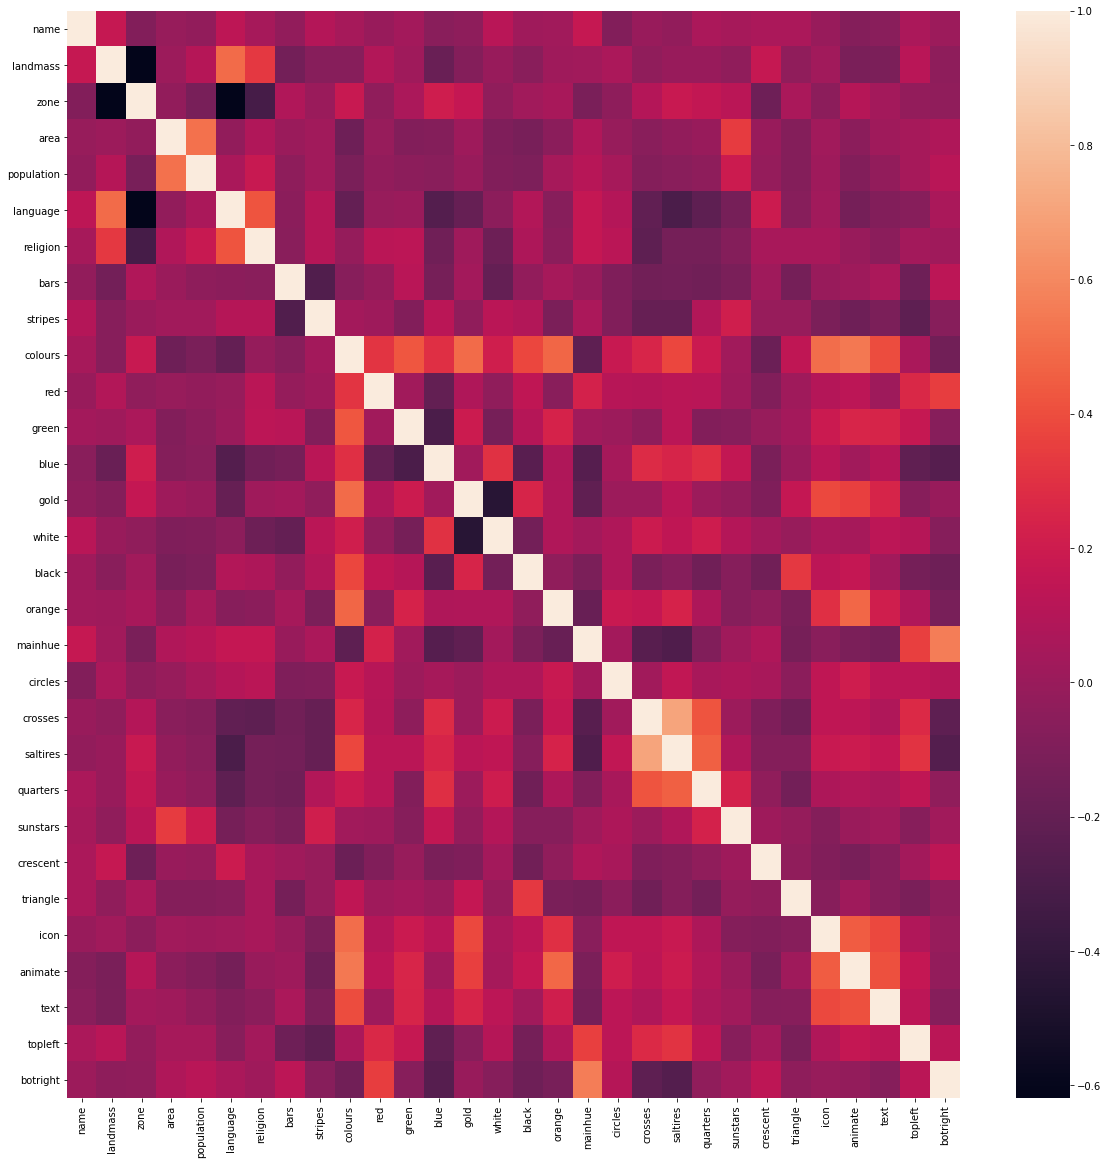

In [107]:
sns.heatmap(data.corr())

**Задание 8 - предсказать регилию по деталям флага**

In [0]:
x = data[['landmass', 'language', 'population']]
y = data['religion']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [131]:
logres = LogisticRegression()
logres.fit(X_train, y_train)
logres.score(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.4020618556701031

In [130]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)
clf.score(x,y)

0.5515463917525774

In [132]:
lin = LinearRegression()
lin.fit(X_train, y_train)
lin.score(x,y)

0.2098858034944372

In [112]:
data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,0,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,4,0,0,0,0,1,0,0,1,0,0,0,4
1,1,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,6,0,0,0,0,1,0,0,0,1,0,6,6
2,2,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,4,0,0,0,0,1,1,0,0,0,0,4,7
3,3,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,6
4,4,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,6
